# How to work with the PDTB

_based on the course "Computational Pragmatics" by Chris Potts_ 

Shared under a cc-by-nc-sa license.
https://creativecommons.org/licenses/by-nc-sa/3.0/

## Loading & accessing the corpus

We can access the corpus using the compiled csv-version (a tabular format with one relation per line): https://boxup.uni-potsdam.de/index.php/s/MxSceyJFraNz5cm (you should know the password). The corpus is provided only as part of the workshop and its data must be removed by participants upon completion.

The python package `pdtb` provides an iterator over the data points in the corpus.

In [33]:
# Needs NLTK

from collections import defaultdict
from pdtb import CorpusReader, Datum

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")


pdtb = CorpusReader('pdtb2.csv')


In [34]:
def relation_count():
    """Calculate and display the distribution of relations."""
    # Create a count dictionary of relations.
    d = defaultdict(int)
    for datum in pdtb.iter_data():
        if datum.Relation == None:
            break
        d[datum.Relation] += 1
    # Print the results to standard output.
    for key, val in d.items():
        print(key, val)
    return()

# This will take a long time, so run with caution!
relation_count()

row 40600


EntRel 5210
Explicit 18459
Implicit 16053
NoRel 254
AltLex 624


()

## Exploring the corpus

* Example relation:

In [35]:
# for datum in pdtb.iter_data():
#     print(datum)
#     break
    
print(next(pdtb.iter_data()))


row 1

Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29. Mr. Vinken is chairman of Elsevier N.V., the Dutch publishing group


* What information do we have for each relation?

In [36]:
Datum.header


['Relation',
 'Section',
 'FileNumber',
 'Connective_SpanList',
 'Connective_GornList',
 'Connective_Trees',
 'Connective_RawText',
 'Connective_StringPosition',
 'SentenceNumber',
 'ConnHead',
 'Conn1',
 'Conn2',
 'ConnHeadSemClass1',
 'ConnHeadSemClass2',
 'Conn2SemClass1',
 'Conn2SemClass2',
 'Attribution_Source',
 'Attribution_Type',
 'Attribution_Polarity',
 'Attribution_Determinacy',
 'Attribution_SpanList',
 'Attribution_GornList',
 'Attribution_Trees',
 'Attribution_RawText',
 'Arg1_SpanList',
 'Arg1_GornList',
 'Arg1_Trees',
 'Arg1_RawText',
 'Arg1_Attribution_Source',
 'Arg1_Attribution_Type',
 'Arg1_Attribution_Polarity',
 'Arg1_Attribution_Determinacy',
 'Arg1_Attribution_SpanList',
 'Arg1_Attribution_GornList',
 'Arg1_Attribution_Trees',
 'Arg1_Attribution_RawText',
 'Arg2_SpanList',
 'Arg2_GornList',
 'Arg2_Trees',
 'Arg2_RawText',
 'Arg2_Attribution_Source',
 'Arg2_Attribution_Type',
 'Arg2_Attribution_Polarity',
 'Arg2_Attribution_Determinacy',
 'Arg2_Attribution_SpanLi

In [37]:
ex_item = next(x for i,x in enumerate(pdtb.iter_data()) if i==3) # Get the 3rd relation
print(ex_item.Relation,ex_item.ConnHead,ex_item.FullRawText)

print("Arg1 = " + ex_item.Arg1_RawText)
print("Arg2 = " + ex_item.Arg2_RawText)

row 4

Explicit although Although preliminary findings were reported more than a year ago, the latest results appear in today's New England Journal of Medicine, a forum likely to bring new attention to the problem
Arg1 = the latest results appear in today's New England Journal of Medicine, a forum likely to bring new attention to the problem
Arg2 = preliminary findings were reported more than a year ago


## Semantic classes

We can look at the semantic classes present in the corpus.

*NOTE:* This is the 2.0 version of the PDTB, which still uses the (deprecated) PDTB 2.0 set of relations. PDTB 3.0 has just been released.

In [38]:
def count_semantic_classes():
    """Count ConnHeadSemClass1 values."""
    d = defaultdict(int)
    exp = defaultdict(int)
    imp = defaultdict(int)
    for datum in pdtb.iter_data():
        sc = datum.ConnHeadSemClass1
        # Filter None values (should be just EntRel/NonRel data).
        if sc:
            d[sc] += 1
            if datum.Relation == "Explicit":
                exp[sc] += 1
            elif datum.Relation == "Implicit":
                imp[sc] += 1
    return (d,exp,imp)

(sem_all, sem_exp, sem_imp) = count_semantic_classes()

row 40600


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

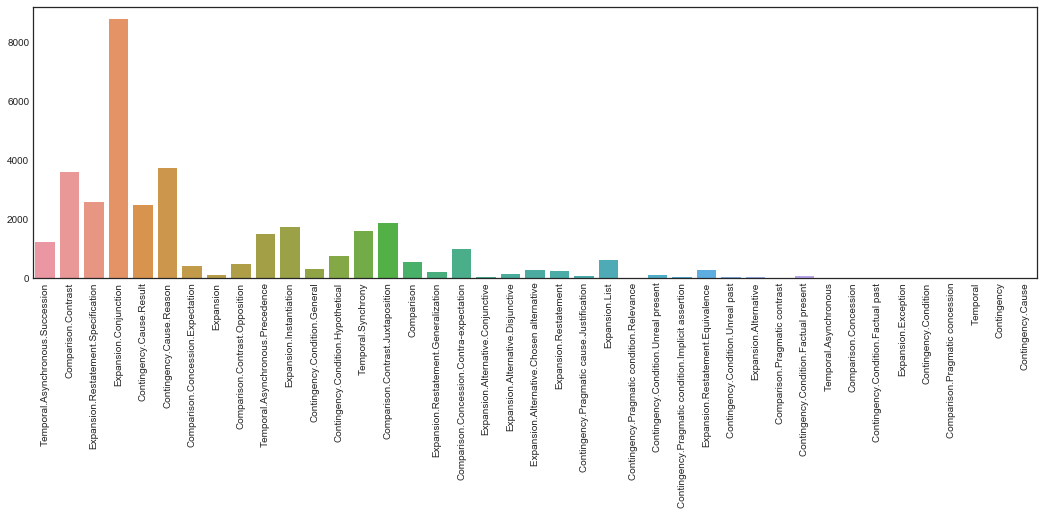

In [39]:
pylab.rcParams['figure.figsize'] = (18, 5)

ax = sns.barplot(list(sem_all.keys()), list(sem_all.values()))
xticks(rotation='vertical')


No handles with labels found to put in legend.


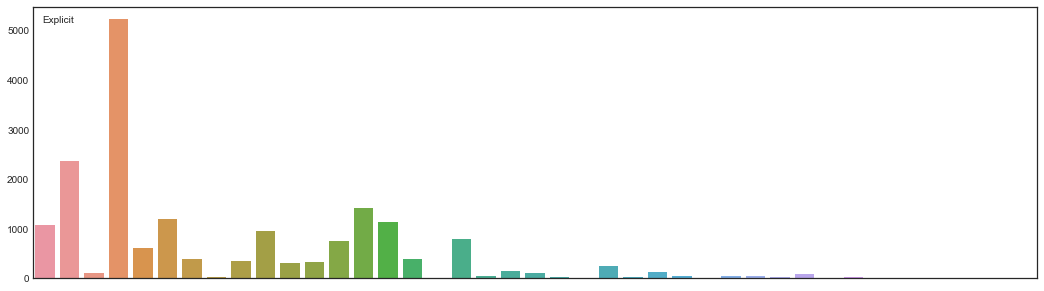

No handles with labels found to put in legend.


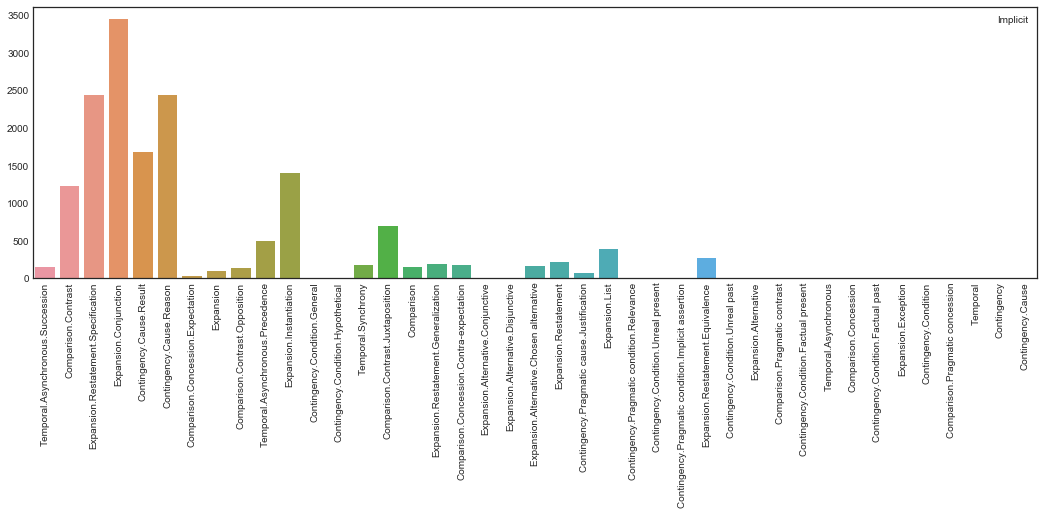

In [40]:
ax = sns.barplot(list(sem_exp.keys()), list(sem_exp.values()), order=sem_all.keys())
ax.set_xticks([])
plt.legend(title="Explicit")
plt.show()
ax = sns.barplot(list(sem_imp.keys()), list(sem_imp.values()), order=sem_all.keys())
xticks(rotation='vertical')
plt.legend(title="Implicit")
plt.show()

## Connectives

Looking at the connectives (only for *Explicit* relations):

In [41]:
def print_connectives():
    """Print all connectives."""
    d = defaultdict(int)
    for datum in pdtb.iter_data():
        if datum.Relation == "Explicit":
            conn = datum.ConnHead
            d[conn] += 1
    return d

ALL_CONNECTIVES = print_connectives()

row 40600


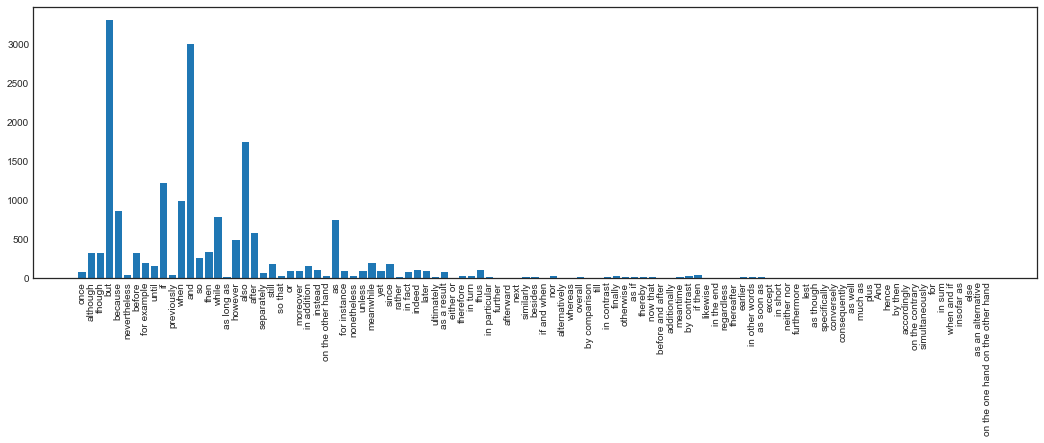

In [42]:
plt.bar(*zip(*ALL_CONNECTIVES.items()))
xticks(rotation='vertical')

plt.show()

<div class="alert alert-block alert-info">
**Question 1:** How are the connectives distributed in Explicit vs. Implicit relations (similar to the senses we looked at)?
</div>

## Answering some questions about the data

### Disconnected argument spans


<div class="alert alert-block alert-info">
**Question 2:** When does it happen that argument spans are not continuous (that is, something is "missing" from within either argument)?
</div>

In [43]:
ex_item.Arg2_SpanList

[[543, 598]]

In [44]:
i = 0
for datum in pdtb.iter_data():
    i+=1
    if i>200:
        break
    if datum.Relation=="Explicit":
        arg1spans = datum.Arg1_SpanList
        arg2spans = datum.Arg2_SpanList
        if len(arg1spans)+len(arg2spans)>2:
            print(datum.ConnHead, datum.Connective_SpanList,arg1spans,arg2spans)
            print(datum)
        

row 139

before [[1147, 1153]] [[1051, 1063], [1121, 1146]] [[1154, 1222]]
Nevertheless, said Brenda Malizia Negus, editor of Money Fund Report, yields "may blip up again before they blip down" because of recent rises in short-term interest rates
for example [[1288, 1299]] [[1051, 1063], [1121, 1222]] [[1224, 1286], [1301, 1325]]
Nevertheless, said Brenda Malizia Negus, editor of Money Fund Report, yields "may blip up again before they blip down" because of recent rises in short-term interest rates. The yield on six-month Treasury bills sold at Monday's auction, for example, rose to 8.04% from 7.90%
also [[1397, 1401]] [[1208, 1384]] [[1388, 1396], [1402, 1465]]
When we evaluated raising our bid, the risks seemed substantial and persistent over the next five years, and the rewards seemed a long way out. That got hard to take," he added.  Mr. Rowe also noted that political concerns also worried New England Electric
also [[1432, 1436]] [[993, 1205]] [[1408, 1431], [1437, 1465]]
the company's retu

row 201

in addition [[2456, 2467]] [[2295, 2333], [2371, 2454]] [[2469, 2560]]
The SEC documents describe those chips, which are made of gallium arsenide, as being so fragile and minute they will require special robotic handling equipment. In addition, the Cray-3 will contain 16 processors -- twice as many as the largest current supercomputer
also [[2578, 2582]] [[2456, 2560]] [[2564, 2577], [2583, 2641]]
In addition, the Cray-3 will contain 16 processors -- twice as many as the largest current supercomputer.  Cray Computer also will face intense competition, not only from Cray Research, which has about 60% of the world-wide supercomputer market and which is expected to roll out the C-90 machine, a direct competitor with the Cray-3, in 1991
also [[2812, 2816]] [[2564, 2641]] [[2800, 2811], [2817, 2937]]
Cray Computer also will face intense competition, not only from Cray Research, which has about 60% of the world-wide supercomputer market and which is expected to roll out the C-90 machine, a d

### Looking at syntactic trees

Potts has also included the syntactic trees of arguments (and connectives) in the same data structure. This means we can look at them and for example see which types of arguments occur for certain connectives, etc.

In [45]:
i = 0
for datum in pdtb.iter_data():
    i+=1
    if i>200:
        break
    if datum.Relation=="Implicit":
        print(datum)
        print(datum.Arg1_Trees)
        print(datum.Arg2_Trees)
        break
 

row 5

This is an old story. We're talking about years ago before anyone heard of asbestos having any questionable properties
[Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]
[Tree('S', [Tree('NP-SBJ', [Tree('PRP', ['We'])]), Tree('VP', [Tree('VBP', ["'re"]), Tree('VP', [Tree('VBG', ['talking']), Tree('PP-CLR', [Tree('IN', ['about']), Tree('ADVP-TMP', [Tree('ADVP', [Tree('NP', [Tree('NNS', ['years'])]), Tree('IN', ['ago'])]), Tree('SBAR', [Tree('IN', ['before']), Tree('S', [Tree('NP-SBJ', [Tree('NN', ['anyone'])]), Tree('VP', [Tree('VBD', ['heard']), Tree('PP-CLR', [Tree('IN', ['of']), Tree('S-NOM', [Tree('NP-SBJ', [Tree('NN', ['asbestos'])]), Tree('VP', [Tree('VBG', ['having']), Tree('NP', [Tree('DT', ['any']), Tree('JJ', ['questionable']), Tree('NNS', ['properties'])])])])])])])])])])])]), Tree('.', ['.'])])]



## Further Questions:

3. Which semantic senses occur in *Explicit* vs. *Implicit* relations? Construct a confusion matrix with the Relation types as rows, the ConnHeadSemClass1 as colums, and the cells representing the number of times that the correspondong row and columns values occur together. Are there patterns here that we might take advantage of in experiments predicting Relation-types or semantic coherence classes?

4. Find long-distance relations. These are relations where there is some extra material in between argument 1 and 2. For this, you may want to use functionality similar to the `adjacency_check`-function below. When you find a long-distance relation, save what type of relation it is (should be mainly Explicit), and what the connective is (`ConnHead`). Further, `Datum` also provides a method called `relative_arg_order()`. The function `distribution_of_relative_arg_order()` defined below creates a simple tally of the relative argument orders (Arg1 befor Arg2, Arg2 before Arg1, etc.).

5. How does the **size** of arguments correlate with connectives? Create a dictionary of connective heads and argument sizes. Plot the argument size distributions for a few connectives (or the means for all connectives). 

6. What is the syntactic type of arguments? Which kinds of clauses can you find? Are there any relations between connective heads and syntactic argument types?

7. What is happening in "Attribution"s? Eg, use the function `def print_attribution_texts()` below. 

8. What are the root node labels for the arguments of different connectives?



In [46]:
def adjacency_check(datum):
    """Return True if datum is of the form Arg1 (connective) Arg2, else False"""    
    if not datum.arg1_precedes_arg2():
        return False
    arg1_finish = max([x for span in datum.Arg1_SpanList for x in span])
    arg2_start = min([x for span in datum.Arg2_SpanList for x in span])    
    if datum.Relation == 'Implicit':
        if (arg2_start - arg1_finish) <= 3:
            return True
        else:
            return False
    else:
        conn_indices = [x for span in datum.Connective_SpanList for x in span]
        conn_start = min(conn_indices)
        conn_finish = max(conn_indices)
        if (conn_start - arg1_finish) <= 3 and (arg2_start - conn_finish) <= 3:
            return True
        else:
            return False        

In [47]:
adjacency_check(ex_item)

False

In [48]:
from operator import itemgetter

def distribution_of_relative_arg_order():
    d = defaultdict(int)
    pdtb = CorpusReader('pdtb2.csv')
    for datum in pdtb.iter_data(display_progress=True):
        d[datum.relative_arg_order()] += 1
    for order, count in sorted(list(d.items()), key=itemgetter(1), reverse=True):
        print(order, count)
    
distribution_of_relative_arg_order()

row 40600

arg1_precedes_arg2 38041
arg2_precedes_arg1 1763
arg1_contains_arg2 765
arg2_contains_arg1 31


In [49]:
def print_attribution_texts():
    """Inspect the strings characterizing attribution values."""
    pdtb = CorpusReader('pdtb2.csv')
    for datum in pdtb.iter_data(display_progress=False):
        txt = datum.Attribution_RawText
        if txt:
            print(txt)

In [50]:
attr = print_attribution_texts()
attr

researchers said
A Lorillard spokewoman said
A Lorillard spokewoman said
said Darrell Phillips, vice president of human resources for Hollingsworth & Vose
said Darrell Phillips, vice president of human resources for Hollingsworth & Vose
Longer maturities are thought
Shorter maturities are considered
considered by some
said Brenda Malizia Negus, editor of Money Fund Report
the Treasury said
The Treasury said
Newsweek said
said Mr. Spoon
According to Audit Bureau of Circulations
According to Audit Bureau of Circulations
saying that
John Rowe, president and chief executive officer of New England Electric, said
John Rowe, president and chief executive officer of New England Electric, said
he added
he added
he added
he added
Mr. Rowe also noted
he said
he added
Mr. Ross asserted
Mr. Ross asserted he added
Northeast said
Northeast said
Northeast said
Judge Curry said
Documents filed with the Securities and Exchange Commission on the pending spinoff disclosed
Documents filed with the Securiti

he said
They will also tell you
They will also tell you
I still say
watching
Mr. Mulford said
Rep. John LaFalce (D., N.Y.) said
asked
Mr. Mulford said
Mr. Mulford said
he said
he said
persuading Europeans
they contend
Oleg A. Grinevsky, the chief Soviet negotiator in the conventional-arms talks, argued
Oleg A. Grinevsky, the chief Soviet negotiator in the conventional-arms talks, argued
argued
according to one U.S. official,
asks Rep. Norman Dicks (D., Wash.), a member of the House group that visited the talks in Vienna
asks Rep. Norman Dicks (D., Wash.), a member of the House group that visited the talks in Vienna
asks Rep. Norman Dicks (D., Wash.), a member of the House group that visited the talks in Vienna
it is too early to say
White House aides said
Democrats argued
Rep. Austin Murphy (D., Pa.), chairman of the House labor standards subcommittee, said
The AFL-CIO said
The AFL-CIO said
Moody's said
the department said
a recent poll of 53 executives on its board found
60% of the ex

Mr. Boyd explains
Mr. Boyd explains
Lone Star Technologies said
The Lone Star Steel lawsuit also asks the court to rule
The Lone Star Steel lawsuit asks
says Sandy Bettencourt, the judge's court reporter
My belief is
says Melanie Carvain of Morristown, N.J
Your Oct. 4 front page noted
In an interview with the trade journal Automotive News, Mr. Iacocca declined to say
he said
At Chrysler's 1990 model preview last month, Chrysler Motors President Robert A. Lutz said
General Motors Corp. has signaled
Mr. Lutz said last month
he added
Revco insists
he feared
they say
they say
said Jeffrey Stein, an analyst at McDonald & Co., Cleveland
said Jeffrey Stein, an analyst at McDonald & Co., Cleveland
he said
Revco's chairman and chief executive officer, Boake A. Sells, said
Revco's chairman and chief executive officer, Boake A. Sells, said
Mr. Sells said
Mr. Sells said, adding
Mr. Schulte, who met with Acadia representatives on Oct. 10, said
analysts said
At least one analyst noted
According to F

he said
he said
Mr. Wyss said
machine tool makers say
says Christopher C. Cole, group vice president at Cincinnati Milacron Inc., the nation's largest machine tool producer
Mr. Cole says
Mr. Cole says
machine tool builders say
complains one machine tool producer
U.S. machine tool makers say
says S.A. Dave, chairman of the Securities and Exchange Board of India
says S.A. Dave, chairman of the Securities and Exchange Board of India
says G.S. Patel, a former chairman of the giant, government-run mutual fund, the Unit Trust of India
he said
he says
He says
He says
He says
he says
according to analysts
Mr. Patel agrees
said one knowledgeable individual
said one knowledgeable individual
said one knowledgeable individual
One auto-industry union leader said
ABBIE (cont'd.)
as CBS Broadcast Group president Howard Stringer puts it
says Joe Sukle, the editor of the weekly Press and Journal in Middletown
says Joe Sukle, the editor of the weekly Press and Journal in Middletown
Mr. Sukle says he wou

says Mr. Frank, senior vice president at International Management Group
says Mr. Frank, senior vice president at International Management Group
says David J. Stern, the commissioner of the National Basketball Association
says David J. Stern, the commissioner of the National Basketball Association
says David J. Stern, the commissioner of the National Basketball Association
he says
Then, he answers his own question
says Janlori Goldman, a staff attorney at the American Civil Liberties Union
Both companies stress
says Richard Barton of the Direct Marketing Association of America
But opponents, led by the CWA, say
He says
says Mr. Appel
IBM said
IBM said
IBM said
IBM said
Jay Stevens of Dean Witter Reynolds Inc. said
Large Digital buyers say
Digital also plans
said Bill Grabe, a senior IBM marketing executive
IBM, Armonk, N.Y., said it wanted
IBM has already indicated
said press secretary Marlin Fitzwater
AT&T said
said Robert Freedman, a partner at Simpson Thacher & Bartlett
said Robert F

A De Beers spokesman said yesterday
the paper said
Japanese tourists will be told
according to NHTSA
The report showed
The report showed
as Mr. Roberts alleges
A spokesman for the Chinese Embassy here said
Analysts say
he said
he said
he said
as having said
as having said
The Des Moines-based publisher said
he said
he said
said Mr. Murphy
said Mr. Murphy
said Mr. Murphy
Your Sept. 21 article
adding
said Mr. Kummerfeld
Mr. Lipstein said
Mr. Lipstein said
he added
said Mr. Ritterman
said Mr. Ritterman
said Mr. Ritterman
In another experiment, an elaborate chart with color codes reveals
He adds
He adds
He adds
He adds
he says
says Amitai Etzioni, a prominent sociologist who teaches at George Washington University
says Amitai Etzioni, a prominent sociologist who teaches at George Washington University
says Mr. Boies of Cravath, Swaine & Moore
says Mr. Boies of Cravath, Swaine & Moore
says Energy Transportation trial attorney Harry Reasoner of Vinson & Elkins
says Energy Transportation tria

made a decision in the summer of 1986
As the report issued by the subcommittee concluded
As the report issued by the subcommittee concluded
he says
Says Mr. Chan
says Nguyen Duy, a poet who is the paper's bureau chief for southern Vietnam
she says
As for property and casualty insurers, Moody's said
Mr. Johnson said
Mr. Johnson said
he said
he said
He said
he said
he said
Minpeco now says
his attorney says
Minpeco has threatened
Minpeco said
says Justice Department attorney Grover Hartt III, who represents the IRS in the case
Banc One said
Mr. Dreyer said
Tan Sri Basir said
He said
Tan Sri Basir said
Tan Sri Basir said
he said
she says
she says
Linda Bowker tells a reporter in the Trenton office of the National Organization for Women
Linda Bowker tells a reporter in the Trenton office of the National Organization for Women
Linda Bowker tells a reporter in the Trenton office of the National Organization for Women
polls indicate
he asks
he says
says Mr. Pignatelli, a 40-year-old health of

he said
he said
Sir James has said
government and corporate transport officials said
he said
Mr. Schumacher said
Mr. Schumacher said
Mr. Schumacher said
A UPS spokesman said
A UPS spokesman said
said a Southern Pacific spokesman
The passenger railroad said
said Mr. Engelken
Mr. Engelken said
He added
an FAA spokeswoman said
A United spokesman said
The United spokesman said
The United spokesman said
A Japan Air Lines spokesman said
a Grand Met spokesman said
an Allied-Lyons spokesman said
a Digital executive complains
concedes Kenneth H. Olsen, Digital's president
Stanley Rose, a vice president, technological and strategic planning at Bankers Trust, says
he says
he says
he says
traders said
traders said
said Raymond F. DeVoe Jr., market strategist at Legg Mason Wood Walker
Mr. DeVoe added
Mr. DeVoe added
said Charles I. Clough, chief investment strategist at Merrill Lynch Capital Markets
said Charles I. Clough, chief investment strategist at Merrill Lynch Capital Markets
as investors co

Mr. Nichols said
Mr. Nichols said
he said
he said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
Dinsa Mehta, chief bullion trader for Chase Manhattan Bank, said
he said
he noted
he said
oil prices are expected
he said
he said
fears
A Zimbabwean delegate argued
A Zimbabwean delegate argued
an SBA official says
The garage owners say
They say
They say
says a survey by the Foster McKay Group, a New York recruiting firm
The company said
Moody's said
Before his assassination in 1988, President Zia of Pakistan repeatedly stated
The wonder is
Last summer, in response to congressional criticism, the State Department and the CIA said
it is not clear
he asserts
he asserts
What's surprising is
says Rep. Dan Burton, an India

The institutions appeared confident
he said
he said
he said
he said
He said
Brokers and fund managers said
said William Au Yeung, an account executive for Drexel Burnham Lambert (HK) Ltd. in Hong Kong
said William Au Yeung, an account executive for Drexel Burnham Lambert (HK) Ltd. in Hong Kong
said William Au Yeung, an account executive for Drexel Burnham Lambert (HK) Ltd. in Hong Kong
Several analysts said
said Elizabeth Hambrecht, a regional analyst with Baring Securities (Hong Kong) Ltd
said Elizabeth Hambrecht, a regional analyst with Baring Securities (Hong Kong) Ltd
She pointed out
he said
Analysts cited memories of two years ago
to have said once
We've always thought
Mr. Van de Kamp and his allies may be hoping
A troubling sign
said Arthur Cashin Jr., a veteran PaineWebber Inc. trader at the Big Board
said Arthur Cashin Jr., a veteran PaineWebber Inc. trader at the Big Board
said Arthur Cashin Jr., a veteran PaineWebber Inc. trader at the Big Board
said Arthur Cashin Jr., a vete

according to Richard Heinemann, Time associate publisher
said Mr. Heinemann
said Mr. Heinemann
according to Audit Bureau of Circulations
said Michael Drexler, national media director at Bozell Inc. ad agency
said Michael Drexler, national media director at Bozell Inc. ad agency
said Michael Drexler, national media director at Bozell Inc. ad agency
said Michael Drexler, national media director at Bozell Inc. ad agency
CNN executives worry
says Ed Turner, CNN's executive vice president, news gathering
says Mr. Amos
says Mr. Amos
the network discovered
that many in the industry are skeptical
Says Mr. Mosettig
Says Mr. Mosettig
says Robert Stengel, senior vice president, programming, of Continental Cablevision Inc
Valley Federal had said
it expected
that it is considering
The thrifts' lawyers claim
the court wrote
he plans to file a brief this week
he plans to file a brief this week
he says
The Soviet Union reported
The Soviet Union reported
We have concluded
The franchisees, owners or ope

Monsanto has said
doubters say
Freddie Mac said
he said
he said
he said
said Gary Ciminero, economist at Fleet/Norstar Financial Group
Economists say
Rollin S. Trexler
Rollin S. Trexler
C.E. Friedman
According to the program's publicity prospectus
Sir James in August agreed
He said
he said
We hope
We hope
said
A spokesman for B.A.T said of the amended filings that
A spokesman for B.A.T said of the amended filings
the spokesman added
the spokesman added
he added
says Andrew Deak, a computer-science student at the Technical University in Budapest
some of the network's Hungarian listeners say
says a Budapest translator
says a Budapest translator
She wants
says Mr. Deak, the student
the advocates reasoned
American Physicians said
the institute said
they argue
Mr. Darman replied
he said
he said
said one senior administration official
said one senior administration official
Administration officials say
says Stephen B. Timbers, chief investment officer of Chicago-based Kemper Financial Servic